In [2]:
# importing necessities
import json
import numpy as np
import matplotlib.pyplot as plt

Mean rating: 3.96
Median rating: 4.00
Standard deviation: 0.54
Total samples: 24


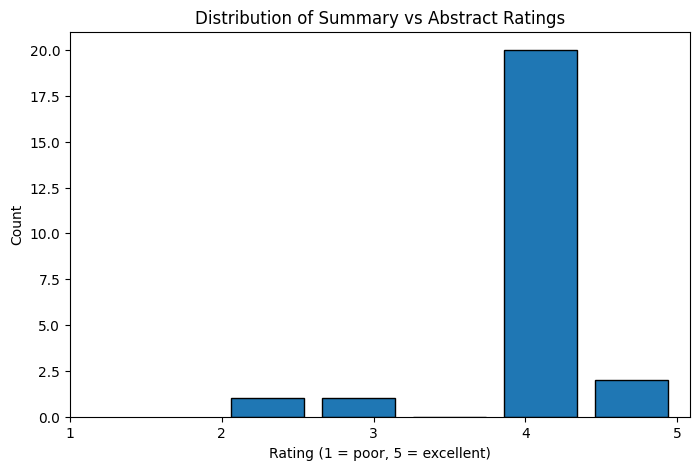


Examples of poor matches:

File: psychpaper25.pdf
Rating: 2
Explanation: The summary touches on some key points mentioned in the abstract, such as the impact of natural disasters, COVID-19 stress, and the importance of empathy and social support. However, it lacks specificity and coherence in summarizing the research papers mentioned in the abstract.
File: psychpaper07.pdf
Rating: 3
Explanation: The summary captures some key points from the abstract, such as the focus on mental health interventions for young people in low-resource settings, the importance of involving parents, and the challenges associated with parental involvement. However, it lacks details on the specific mechanisms for engaging parents and the study's methodology.
File: psychpaper14.pdf
Rating: 4
Explanation: The summary effectively captures the key points of the abstract, including the problem of returns on e-commerce platforms, the role of perceived information overload, impulsive buying behavior, cognitive disso

In [3]:
# json comparison file path
COMPARISONS_JSON = "/Users/nataliepegues/data4380.np/llm_workspace/data/comparisons.json"

# loading comparison results
with open(COMPARISONS_JSON, "r") as f:
    comparisons = json.load(f)

# extracting ratings
ratings = [entry["rating"] for entry in comparisons if entry["rating"] is not None]

# statistical summaries
mean_rating = np.mean(ratings)
median_rating = np.median(ratings)
std_rating = np.std(ratings)

print(f"Mean rating: {mean_rating:.2f}")
print(f"Median rating: {median_rating:.2f}")
print(f"Standard deviation: {std_rating:.2f}")
print(f"Total samples: {len(ratings)}")

# plotting rating distribution
plt.figure(figsize=(8,5))
plt.hist(ratings, bins=5, edgecolor='black', rwidth=0.8)
plt.title("Distribution of Summary vs Abstract Ratings")
plt.xlabel("Rating (1 = poor, 5 = excellent)")
plt.ylabel("Count")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

# showing examples
sorted_comparisons = sorted(
    [c for c in comparisons if c["rating"] is not None],
    key=lambda x: x["rating"]
)

print("\nExamples of poor matches:\n")
for entry in sorted_comparisons[:3]:
    print(f"File: {entry['filename']}")
    print(f"Rating: {entry['rating']}")
    print(f"Explanation: {entry['explanation']}")
    print("="*50)

print("\nExamples of excellent matches:\n")
for entry in sorted_comparisons[-3:]:
    print(f"File: {entry['filename']}")
    print(f"Rating: {entry['rating']}")
    print(f"Explanation: {entry['explanation']}")
    print("="*50)
